In [20]:
#importing Libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [21]:
#Loading dataset
iris=datasets.load_iris()
X=iris.data[:,:2]
y=(iris.target==0).astype(int)

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)


In [23]:
svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [24]:
y_pred=svm_classifier.predict(X_test)

In [25]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy : {accuracy*100:.2f}%")

Accuracy : 100.00%


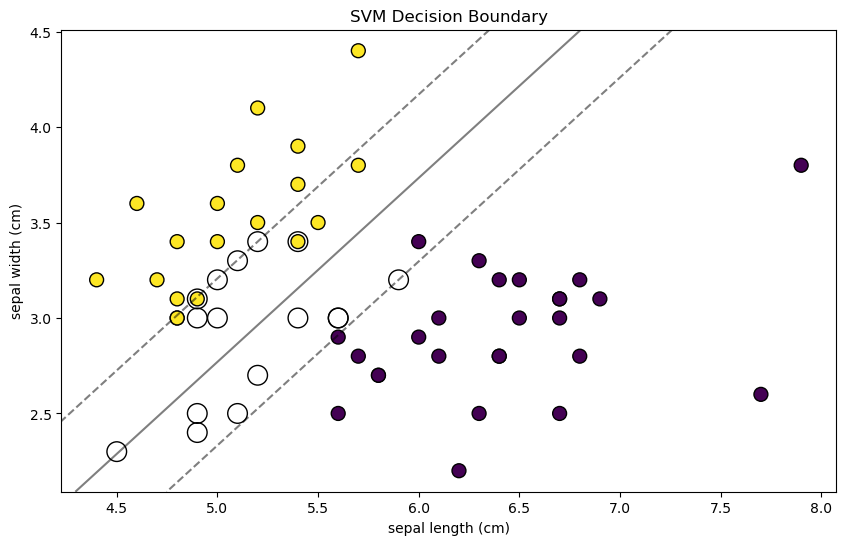

In [29]:
#Visulization
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', marker='o', edgecolor='k', s=100)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_classifier.decision_function(xy).reshape(XX.shape)
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
ax.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], s=200,linewidth=1, facecolors='none', edgecolors='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('SVM Decision Boundary')
plt.show()